# Machine Learning in Python
The content for this notebook was copied from [The Deep Learning Machine Learning in Python lab](https://github.com/Microsoft/computerscience/tree/master/Labs/Deep%20Learning/200%20-%20Machine%20Learning%20in%20Python). 
This demo shows prediction of flight delays between airport pairs based on the day of the month using a random forest.
The demo concludes by visualizing the probability of on-time arrival between JFK and Atlanta Hartsfield-Jackson oves consecutive days.

In this exercise, you will import a dataset from Azure blob storage and load it into the notebook. Jupyter notebooks are highly interactive, and since they can include executable code, they provide the perfect platform for manipulating data and building predictive models from it.

## Ingest

cURL is a familiar tool to transfer data to or from servers using familiar protocols such as http, https, ftp, ftps, etc.
In the code cell below cURL is used to download Flight Data from a public blob storage to the working directory.

In [2]:
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0  2219k      0 --:--:-- --:--:-- --:--:-- 2224k


Pandas will be used here to create a data frame in which the data will be manipulated and massaged for enhanced analysis.

Import the data and create a pandas DataFrame from it, and display the first five rows.

In [3]:
import pandas as pd

df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


The DataFrame that you created contains on-time arrival information for a major U.S. airline. It has more than 11,000 rows and 26 columns. (The output says "5 rows" because DataFrame's head function only returns the first five rows.) Each row represents one flight and contains information such as the origin, the destination, the scheduled departure time, and whether the flight arrived on time or late. You will learn more about the data, including its content and structure, in the next lab.

## Process

In the real world, few datasets can be used as-is to train machine-learning models. It is not uncommon for data scientists to spend 80% or more of their time on a project cleaning, preparing, and shaping the data — a process sometimes referred to as data wrangling. Typical actions include removing duplicate rows, removing rows or columns with missing values or algorithmically replacing the missing values, normalizing data, and selecting feature columns. A machine-learning model is only as good as the data it is trained with. Preparing the data is arguably the most crucial step in the machine-learning process.

Before you can prepare a dataset, you need to understand its content and structure. In the previous steps, you imported a dataset containing on-time arrival information for a major U.S. airline. That data included 26 columns and thousands of rows, with each row representing one flight and containing information such as the flight's origin, destination, and scheduled departure time. You also loaded the data into the Jupyter notebook and used a simple Python script to create a pandas DataFrame from it.

To get a count of rows, run the following code:

In [4]:
df.shape

(11231, 26)

Now take a moment to examine the 26 columns in the dataset. They contain important information such as the date that the flight took place (YEAR, MONTH, and DAY_OF_MONTH), the origin and destination (ORIGIN and DEST), the scheduled departure and arrival times (CRS_DEP_TIME and CRS_ARR_TIME), the difference between the scheduled arrival time and the actual arrival time in minutes (ARR_DELAY), and whether the flight was late by 15 minutes or more (ARR_DEL15).

Here is a complete list of the columns in the dataset. Times are expressed in 24-hour military time. For example, 1130 equals 11:30 a.m. and 1500 equals 3:00 p.m.

In [5]:
list(df)

['YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'UNIQUE_CARRIER',
 'TAIL_NUM',
 'FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN',
 'DEST_AIRPORT_ID',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DEL15',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DEL15',
 'CANCELLED',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'DISTANCE',
 'Unnamed: 25']

One of the first things data scientists typically look for in a dataset is missing values. There's an easy way to check for missing values in pandas. To demonstrate, execute the following code:

In [6]:
df.isnull().values.any()

True

The next step is to find out where the missing values are. To do so, execute the following code:

In [8]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

Curiously, the 26th column ("Unnamed: 25") contains 11,231 missing values, which equals the number of rows in the dataset. This column was mistakenly created because the CSV file that you imported contains a comma at the end of each line. To eliminate that column, execute the following code: 

In [9]:
df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

The DataFrame still contains a lot of missing values, but some of them are irrelevant because the columns containing them are not relevant to the model that you are building. The goal of that model is to predict whether a flight you are considering booking is likely to arrive on time. If you know that the flight is likely to be late, you might choose to book another flight.

The next step, therefore, is to filter the dataset to eliminate columns that aren't relevant to a predictive model. For example, the aircraft's tail number probably has little bearing on whether a flight will arrive on time, and at the time you book a ticket, you have no way of knowing whether a flight will be cancelled, diverted, or delayed. By contrast, the scheduled departure time could have a lot to do with on-time arrivals. Because of the hub-and-spoke system used by most airlines, morning flights tend to be on time more often than afternoon or evening flights. And at some major airports, traffic stacks up during the day, increasing the likelihood that later flights will be delayed.

Pandas provides an easy way to filter out columns you don't want. Execute the following code:

In [10]:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

The only column that now contains missing values is the ARR_DEL15 column, which uses 0s to identify flights that arrived on time and 1s for flights that didn't. Use the following code to show the first five rows with missing values:

In [11]:
df[df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


The reason these rows are missing ARR_DEL15 values is that they all correspond to flights that were canceled or diverted. You could call dropna on the DataFrame to remove these rows. But since a flight that is canceled or diverted to another airport could be considered "late," let's use the fillna method to replace the missing values with 1s.

Use the following code to replace missing values in the ARR_DEL15 column with 1s and display rows 177 through 184:

In [12]:
df = df.fillna({'ARR_DEL15': 1})
df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


Use the following code to display the first five rows of the DataFrame:

In [13]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0


The CRS_DEP_TIME column of the dataset you are using represents scheduled departure times. The granularity of the numbers in this column — it contains more than 500 unique values — could have a negative impact on accuracy in a machine-learning model. This can be resolved using a technique called binning or quantization. What if you divided each number in this column by 100 and rounded down to the nearest integer? 1030 would become 10, 1925 would become 19, and so on, and you would be left with a maximum of 24 discrete values in this column. Intuitively, it makes sense, because it probably doesn't matter much whether a flight leaves at 10:30 a.m. or 10:40 a.m. It matters a great deal whether it leaves at 10:30 a.m. or 5:30 p.m.

In addition, the dataset's ORIGIN and DEST columns contain airport codes that represent categorical machine-learning values. These columns need to be converted into discrete columns containing indicator variables, sometimes known as "dummy" variables. In other words, the ORIGIN column, which contains five airport codes, needs to be converted into five columns, one per airport, with each column containing 1s and 0s indicating whether a flight originated at the airport that the column represents. The DEST column needs to be handled in a similar manner.

In this portion of the exercise, you will "bin" the departure times in the CRS_DEP_TIME column and use pandas' get_dummies method to create indicator columns from the ORIGIN and DEST columns.

Use the following code to bin the departure times:

In [15]:
import math

for index, row in df.iterrows():
    df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,0,0.0
1,1,1,5,DTW,MSP,0,0.0
2,1,1,5,ATL,SEA,0,0.0
3,1,1,5,SEA,MSP,0,0.0
4,1,1,5,SEA,DTW,0,0.0


Now use the following statements to generate indicator columns from the ORIGIN and DEST columns, while dropping the ORIGIN and DEST columns themselves:
Indicator columns make it easier to run the machine learning algorithm on a dataset, by splitting up columns with multiple potential values into many columns with either a 0 or a 1.

In [16]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head() 

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,0,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,0,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,0,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,0,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,0,0.0,0,0,0,0,1,0,1,0,0,0


## Predict

Machine learning, which facilitates predictive analytics using large volumes of data by employing algorithms that iteratively learn from that data, is one of the fastest growing areas of data science.

One of the most popular tools for building machine-learning models is Scikit-learn, a free and open-source toolkit for Python programmers. It has built-in support for popular regression, classification, and clustering algorithms and works with other Python libraries such as NumPy and SciPy. With Sckit-learn, a simple method call can replace hundreds of lines of hand-written code. Sckit-learn allows you to focus on building, training, tuning, and testing machine-learning models without getting bogged down coding algorithms.

We will use Sckit-learn to build a machine-learning model utilizing on-time arrival data for a major U.S. airline. The goal is to create a model that might be useful in the real world for predicting whether a flight is likely to arrive on time. It is precisely the kind of problem that machine learning is commonly used to solve. 

The first statement imports Sckit-learn's train_test_split helper function. The second line uses the function to split the DataFrame into a training set containing 80% of the original data, and a test set containing the remaining 20%. The random_state parameter seeds the random-number generator used to do the splitting, while the first and second parameters are DataFrames containing the feature columns and the label column.

In [17]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)

train_test_split returns four DataFrames. Use the following command to display the number of rows and columns in the DataFrame containing the feature columns used for training:

In [18]:
train_x.shape

(8984, 14)

Now use this command to display the number of rows and columns in the DataFrame containing the feature columns used for testing:

In [20]:
test_x.shape

(2247, 14)

You will train a classification model, which seeks to resolve a set of inputs into one of a set of known outputs.

Sckit-learn includes a variety of classes for implementing common machine-learning models. One of them is RandomForestClassifier, which fits multiple decision trees to the data and uses averaging to boost the overall accuracy and limit overfitting.

Execute the following code to create a RandomForestClassifier object and train it by calling the fit method.

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

The output shows the parameters used in the classifier, including n_estimators, which specifies the number of trees in each decision-tree forest, and max_depth, which specifies the maximum depth of the decision trees. The values shown are the defaults, but you can override any of them when creating the RandomForestClassifier object.

Now call the predict method to test the model using the values in test_x, followed by the score method to determine the mean accuracy of the model:

In [23]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8366711170449488

There are several ways to measure the accuracy of a classification model. One of the best overall measures for a binary classification model is Area Under Receiver Operating Characteristic Curve (sometimes referred to as "ROC AUC"), which essentially quantifies how often the model will make a correct prediction regardless of the outcome. In this exercise, you will compute an ROC AUC score for the model you built in the previous exercise and learn about some of the reasons why that score is lower than the mean accuracy output by the score method. You will also learn about other ways to gauge the accuracy of the model.

Before you compute the ROC AUC, you must generate prediction probabilities for the test set. These probabilities are estimates for each of the classes, or answers, the model can predict. For example, [0.88199435, 0.11800565] means that there's an 89% chance that a flight will arrive on time (ARR_DEL15 = 0) and a 12% chance that it won't (ARR_DEL15 = 1). The sum of the two probabilities adds up to 100%.

Run the following code to generate a set of prediction probabilities from the test data:

In [24]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

Now use the following statement to generate an ROC AUC score from the probabilities using Sckit-learn's roc_auc_score method:

In [26]:
roc_auc_score(test_y, probabilities[:, 1])

0.6546846350083707

Why is the AUC score lower than the mean accuracy computed in the previous exercise?

The output from the score method reflects how many of the items in the test set the model predicted correctly. This score is skewed by the fact that the dataset the model was trained and tested with contains many more rows representing on-time arrivals than rows representing late arrivals. Because of this imbalance in the data, you are more likely to be correct if you predict that a flight will be on time than if you predict that a flight will be late.

ROC AUC takes this into account and provides a more accurate indication of how likely it is that a prediction of on-time or late will be correct.

You can learn more about the model's behavior by generating a confusion matrix, also known as an error matrix. The confusion matrix quantifies the number of times each answer was classified correctly or incorrectly. Specifically, it quantifies the number of false positives, false negatives, true positives, and true negatives. This is important, because if a binary classification model trained to recognize cats and dogs is tested with a dataset that is 95% dogs, it could score 95% simply by guessing "dog" every time. But if it failed to identify cats at all, it would be of little value.

Use the following code to produce a confusion matrix for your model:

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1809,  127],
       [ 240,   71]])

The first row in the output represents flights that were on time. The first column in that row shows how many flights were correctly predicted to be on time, while the second column reveals how many flights were predicted as delayed but were not. From this, the model appears to be very adept at predicting that a flight will be on time.

But look at the second row, which represents flights that were delayed. The first column shows how many delayed flights were incorrectly predicted to be on time. The second column shows how many flights were correctly predicted to be delayed. Clearly, the model isn't nearly as adept at predicting that a flight will be delayed as it is at predicting that a flight will arrive on time. What you want in a confusion matrix is big numbers in the upper-left and lower-right corners, and small numbers (preferably zeros) in the upper-right and lower-left corners.

Other measures of accuracy for a classification model include precision and recall. Suppose the model was presented with three on-time arrivals and three delayed arrivals, and that it correctly predicted two of the on-time arrivals, but incorrectly predicted that two of the delayed arrivals would be on time. In this case, the precision would be 50% (two of the four flights it classified as being on time actually were on time), while its recall would be 67% (it correctly identified two of the three on-time arrivals). You can learn more about precision and recall from https://en.wikipedia.org/wiki/Precision_and_recall

Suppose a computer program for recognizing dogs in photographs identifies 8 dogs in a picture containing 12 dogs and some cats. Of the 8 identified as dogs, 5 actually are dogs (true positives), while the rest are cats (false positives). The program's precision is 5/8 while its recall is 5/12. 

Sckit-learn contains a handy method named precision_score for computing precision. To quantify the precision of your model, execute the following statements:

In [28]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.8047722342733189

Sckit-learn also contains a method named recall_score for computing recall. To measure you model's recall, execute the following statements:

In [29]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.5926517571884984

## Visualize

Now that you that have trained a machine-learning model to perform predictive analytics, it's time to put it to work. In this lab, the final one in the series, you will write a function that uses the machine-learning model you built in the previous lab to predict whether a flight will arrive on time or late. And you will use Matplotlib, the popular plotting and charting library for Python, to visualize the results.

The first statement is one of several magic commands supported by the Python kernel that you selected when you created the notebook. It enables Jupyter to render Matplotlib output in a notebook without making repeated calls to show. And it must appear before any references to Matplotlib itself. The final statement configures Seaborn to enhance the output from Matplotlib.

Execute the following code. Ignore any warning messages that are displayed related to font caching:

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


The first statement is one of several magic commands supported by the Python kernel that you selected when you created the notebook. It enables Jupyter to render Matplotlib output in a notebook without making repeated calls to show. And it must appear before any references to Matplotlib itself. The final statement configures Seaborn to enhance the output from Matplotlib.

To see Matplotlib at work, execute the following code in a new cell to plot the ROC curve for the machine-learning model you built in the previous lab:

Text(0,0.5,'True Positive Rate')

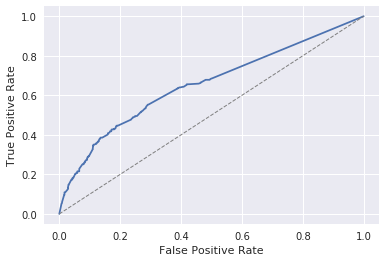

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The dotted line in the middle of the graph represents a 50-50 chance of obtaining a correct answer. The blue curve represents the accuracy of your model. More importantly, the fact that this chart appears at all demonstrates that you can use Matplotlib in a Jupyter notebook.

The reason you built a machine-learning model is to predict whether a flight will arrive on time or late. In this exercise, you will write a Python function that calls the machine-learning model you built in the previous lab to compute the likelihood that a flight will be on time. Then you will use the function to analyze several flights.

This function takes as input a date and time, an origin airport code, and a destination airport code, and returns a value between 0.0 and 1.0 indicating the probability that the flight will arrive at its destination on time. It uses the machine-learning model you built in the previous lab to compute the probability. And to call the model, it passes a DataFrame containing the input values to predict_proba. The structure of the DataFrame exactly matches the structure of the DataFrame depicted in previous steps.

In [34]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)
    
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour
    
    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

Use the code below to compute the probability that a flight from New York to Atlanta on the evening of October 1 will arrive on time. Note that the year you enter is irrelevant because it isn't used by the model.

In [37]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.5916666666666667

Modify the code to compute the probability that the same flight a day later will arrive on time:

In [38]:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.8333333333333334

How likely is this flight to arrive on time? If your travel plans were flexible, would you consider postponing your trip for one day?

Now modify the code to compute the probability that a morning flight the same day from Atlanta to Seattle will arrive on time:

In [40]:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

0.925

In this exercise, you will combine the predict_delay function you created in the previous exercise with Matplotlib to produce side-by-side comparisons of the same flight on consecutive days and flights with the same origin and destination at different times throughout the day.

(0.0, 1.0)

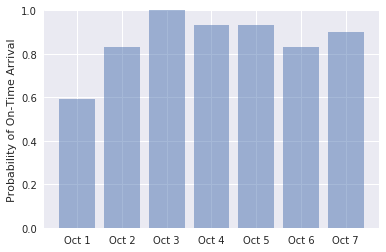

In [41]:
import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

Referenced from https://github.com/Microsoft/computerscience/tree/master/Labs/Deep%20Learning/200%20-%20Machine%20Learning%20in%20Python, 12/17/2018